Digite o numero de simulacoes: 1000
Digite o numero de cenários: 1000
Digite a probabilidade de sinistro(ex. 0.02): 0.02
Digite a severidade média: 1000
Digite a distribuicao (Exponencial ou Uniforme): uniforme
Sinistros: 
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  2.  0.  0.  1.  1.  1.  3.  2.  1.  1.  2.
  1.  2.  2.  0.  0.  0.  0.  2.  1.  1.  1.  2.  0.  3.  0.  0.  1.  2.
  0.  0.  0.  4.  1.  0.  1.  1.  1.  0.  1.  3.  3.  3.  0.  1.  1.  2.
  2.  1.  1.  2.  1.  3.  2.  1.  4.  2.  5.  1.  1.  1.  2.  5.  2.  4.
  2.  1.  3.  1.  0.  3.  0.  4.  4.  3.  3.  0.  1.  2.  4.  2.  4.  1.
  1.  1.  2.  2.  3.  0.  0.  2.  1.  3.  3.  1.  3.  4.  2.  3.  1.  2.
  7.  4.  0.  1.  1.  2.  2.  3.  1.  3.  3.  3.  2.  4.  1.  3.  3.  5.
  1.  4.  2.  6.  3.  2.  2.  2.  1.  4.  2.  4.  6.  2.  1.  6.  3.  2.
  2.  2.  3.  8.  7.  2.  6.  6.  5.  5.  4.  4.  4.  2.  3.  4.  4.  2.
  3.  9.  8.  4.  5.  5.  3.  2.  3.  4.  3.  1

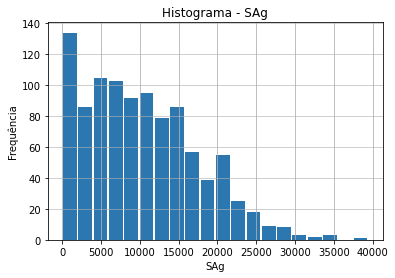

In [9]:
# Simulação do sinistro agregado sob a perspectiva individual em uma carteira fictícia.
# Distribuição da Frequência: Uniforme
# Distribuição da Severidade: Uniforme ou Exponencial

import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

# carteira = Tamanho da carteira: quantidade de segurados 
carteira = int(input("Digite o numero de simulacoes: "))
# cenarios = Quantidades de simulações a serem geradas
cenarios = int(input("Digite o numero de cenários: "))
# prob_sin = Probabilidade de ocorrência de sinistro com um segurado da carteira
prob_sin = float(input("Digite a probabilidade de sinistro(ex. 0.02): "))
# sev_media: Valor monetário esperado de indenização em caso de materialização do sinistro
sev_media = int(input("Digite a severidade média: "))

# replicacoes_ind = Matriz de armazenamento de ocorrências dos sinistros
replicacoes_ind = np.full((carteira, cenarios), 0)
# replicacoes_sev = Matriz que armazena as indenizações($) associadas aos sinistros
replicacoes_sev = np.full((carteira, cenarios), 0)
# SAg = Vetor que armazena diversos resultados aleatórios do Sinistro Agregado
SAg = np.zeros(cenarios)
# quant_sin = Vetor que armazena a quantidade de sinistros ocorridos em cada simulação/cenário
quant_sin = np.zeros(cenarios)

# Função que permite a escolha da distribuição da severidade
def dist_sev(distribuicao, sev_media, carteira, cenarios):
    matriz = np.zeros(carteira, cenarios)
       
    if distribuicao == "exponencial":
        replicacoes_sev = np.random.exponential(scale=sev_media, size= 1)
    elif distribuicao == "uniforme":
        replicacoes_sev = np.random.uniform(low=0, high=sev_media*2, size= 1)
    else:
        return None

    
# Permite a escolha da distribuição de severidade do sinistro    
distribuicao = ""    
while (distribuicao != "exponencial") & (distribuicao != "uniforme"):
    distribuicao = input("Digite a distribuicao (Exponencial ou Uniforme): ")
    distribuicao = distribuicao.lower()    
    
# atribuição de valores para cada matriz(frequência:replicacoes_ind e severidade:replicacoes_sev)    
for j in range(1, cenarios):
    for i in range(1, carteira):
        u = np.random.uniform(0, 1, 1)
        if(u <= prob_sin):
            replicacoes_ind[i, j] = 1 
        else:
            replicacoes_ind[i, j] = 0
            
            
        if(u <= prob_sin):
            replicacoes_sev[i, j] = np.random.exponential(scale=sev_media, size = 1)  
        else:
            replicacoes_sev[i, j] = 0
        
        
    quant_sin[j] = sum(replicacoes_ind[j])
    SAg[j] = np.sum(replicacoes_sev[j])

# quantidade de sinistros por simulação
quant_sin
print("Sinistros: \n" + str(quant_sin))

# Sinistro agregado por simulação
SAg
print("Sinistro Agregado (SAg): \n" + str(SAg))

# Média do SAg
st.mean(SAg)
print("Média SAg: " + str(st.mean(SAg)))

# Desvio-Padrão do SAg
st.stdev(SAg)
print("Desvio-Padrão SAg: " + str(st.stdev(SAg)))

# Quantidade de ocorrências que superaram a média do SAg
dim = np.count_nonzero(SAg > st.mean(SAg))
print("Ocorrências > Média SAg: " + str(dim))

# Prêmio Estatístico
st.mean(SAg) / carteira
print("Prêmio Estatístico: " + str(st.mean(SAg) / carteira))

# prêmio puro por meio das Provisões Técnicas Carregadas, alfa = 25%
percentil_carreg = 0.75
# Provisões Carregadas
np.quantile(SAg, percentil_carreg)
print("Provisões Carregadas: " + str(np.quantile(SAg, percentil_carreg)))
# Prêmio Puro
np.quantile(SAg, percentil_carreg) / carteira
print("Prêmio Puro: " + str(np.quantile(SAg, percentil_carreg) / carteira))

# Probabilidade de ruína(epsilon) por solvência da companhia, Solvency II: épsilon = 0,5%
percentil_solv = 0.995
qt3 = np.quantile(SAg, percentil_solv) - np.quantile(SAg, percentil_carreg)
print("Probabilidade de ruína: " + str(qt3))
# Quantidade de ocorrências que superaram o percentil de solvência
dim2 = np.count_nonzero(SAg > np.quantile(SAg, percentil_solv))
print("Ocorrências > Percentil de Solvência: " + str(dim2))

# Histograma SAg x Frequência
graph = pd.Series(SAg)
graph.plot.hist(grid=True, bins=20, rwidth=0.9,color='#2c77b0')
plt.title('Histograma - SAg')
plt.xlabel('SAg')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)